In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [6]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/28/20', '12/29/20', '12/30/20', '12/31/20', '1/1/21', '1/2/21',
       '1/3/21', '1/4/21', '1/5/21', '1/6/21'],
      dtype='object', length=355)

In [7]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [8]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [9]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [10]:
days_since_1_1 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-30]
print(future_forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [12]:
start = '1/12/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [13]:
def prediction(x):
    x_train_confirmed, x_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, x, 
                                                                                                test_size=0.2, shuffle=False)
    # transform data for polynomial regression
    model = PolynomialFeatures(degree=2)
    model_x_train_confirmed = model.fit_transform(x_train_confirmed)
    model_x_test_confirmed = model.fit_transform(x_test_confirmed)
    model_future_forecast = model.fit_transform(future_forecast)

    # polynomial regression
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(model_x_train_confirmed, y_train_confirmed)
    test_linear_pred = linear_model.predict(model_x_test_confirmed)
    linear_pred = linear_model.predict(model_future_forecast)
    print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
    print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

    plt.plot(y_test_confirmed)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data', 'Polynomial Regression Predictions'])
    print(linear_model.score(model_x_test_confirmed,y_test_confirmed))

    linear_pred = linear_pred.reshape(1,-1)[0]
    model_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-20:])})
    print(model_df)
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

# Cases Prediction

In [14]:
prediction(world_cases)
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 7884728.868003232
MSE: 80358120262828.69
0.4999751845327226
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           77542296.0
1   01/08/2021                           78021541.0
2   01/09/2021                           78502260.0
3   01/10/2021                           78984454.0
4   01/11/2021                           79468122.0
5   01/12/2021                           79953264.0
6   01/13/2021                           80439881.0
7   01/14/2021                           80927972.0
8   01/15/2021                           81417537.0
9   01/16/2021                           81908577.0
10  01/17/2021                           82401092.0
11  01/18/2021                           82895080.0
12  01/19/2021                           83390544.0
13  01/20/2021                           83887481.0
14  01/21/2021                           84385893.0
15  01/22/2021                           84885780.0
16  01/23/2021                           85387140.0

NameError: name 'linear_pred' is not defined

In [ ]:
prediction(india_cases)

In [ ]:
prediction(us_cases)

In [ ]:
prediction(china_cases)

In [ ]:
prediction(france_cases)

In [ ]:
prediction(germany_cases)

In [ ]:
prediction(uk_cases)

In [ ]:
prediction(spain_cases)

In [ ]:
prediction(russia_cases)

In [ ]:
prediction(italy_cases)

# Recoveries Prediction

In [25]:
prediction(total_recovered)
plot_predictions(adjusted_dates, recovery_rate, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 1636697.170953888
MSE: 4865022876236.945
0.8431526591808093
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           56875985.0
1   01/08/2021                           57252745.0
2   01/09/2021                           57630737.0
3   01/10/2021                           58009961.0
4   01/11/2021                           58390418.0
5   01/12/2021                           58772107.0
6   01/13/2021                           59155028.0
7   01/14/2021                           59539181.0
8   01/15/2021                           59924567.0
9   01/16/2021                           60311186.0
10  01/17/2021                           60699036.0
11  01/18/2021                           61088119.0
12  01/19/2021                           61478434.0
13  01/20/2021                           61869982.0
14  01/21/2021                           62262762.0
15  01/22/2021                           62656774.0
16  01/23/2021                           63052018.0

NameError: name 'linear_pred' is not defined

MAE: 1055153.333360705
MSE: 1913549428063.3184
-2.0633463191575383
          Date  Predicted number of Confirmed Cases
0   01/06/2021                           14146574.0
1   01/07/2021                           14252877.0
2   01/08/2021                           14359564.0
3   01/09/2021                           14466636.0
4   01/10/2021                           14574093.0
5   01/11/2021                           14681934.0
6   01/12/2021                           14790161.0
7   01/13/2021                           14898772.0
8   01/14/2021                           15007768.0
9   01/15/2021                           15117148.0
10  01/16/2021                           15226913.0
11  01/17/2021                           15337063.0
12  01/18/2021                           15447598.0
13  01/19/2021                           15558518.0
14  01/20/2021                           15669822.0
15  01/21/2021                           15781511.0
16  01/22/2021                           15893585

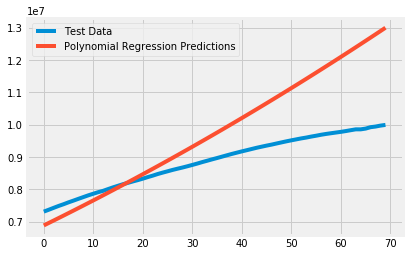

In [25]:
prediction(india_recoveries)

MAE: 844.942519909838
MSE: 1205547.674063688
-0.4095952648539951
          Date  Predicted number of Confirmed Cases
0   01/06/2021                               3555.0
1   01/07/2021                               3567.0
2   01/08/2021                               3580.0
3   01/09/2021                               3593.0
4   01/10/2021                               3605.0
5   01/11/2021                               3618.0
6   01/12/2021                               3631.0
7   01/13/2021                               3643.0
8   01/14/2021                               3656.0
9   01/15/2021                               3669.0
10  01/16/2021                               3682.0
11  01/17/2021                               3695.0
12  01/18/2021                               3707.0
13  01/19/2021                               3720.0
14  01/20/2021                               3733.0
15  01/21/2021                               3746.0
16  01/22/2021                               3759.0

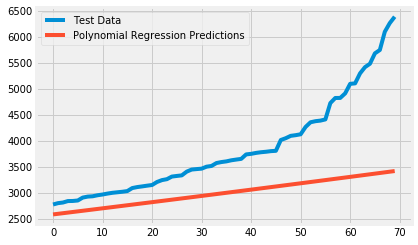

In [26]:
prediction(uk_recoveries)

MAE: 2072367.5794525342
MSE: 10778498079236.492
-1.0821068323055791
          Date  Predicted number of Confirmed Cases
0   01/06/2021                            6572320.0
1   01/07/2021                            6614094.0
2   01/08/2021                            6655999.0
3   01/09/2021                            6698036.0
4   01/10/2021                            6740204.0
5   01/11/2021                            6782503.0
6   01/12/2021                            6824934.0
7   01/13/2021                            6867496.0
8   01/14/2021                            6910190.0
9   01/15/2021                            6953015.0
10  01/16/2021                            6995971.0
11  01/17/2021                            7039059.0
12  01/18/2021                            7082278.0
13  01/19/2021                            7125628.0
14  01/20/2021                            7169110.0
15  01/21/2021                            7212723.0
16  01/22/2021                            725646

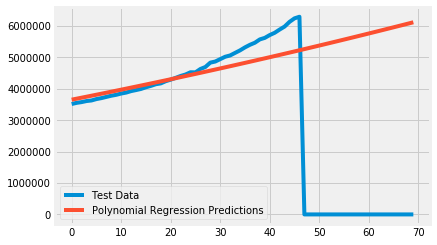

In [27]:
prediction(us_recoveries)

MAE: 36104.15713496828
MSE: 1613561776.7370489
0.0
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              67424.0
1   01/07/2021                              66149.0
2   01/08/2021                              64864.0
3   01/09/2021                              63571.0
4   01/10/2021                              62269.0
5   01/11/2021                              60958.0
6   01/12/2021                              59639.0
7   01/13/2021                              58310.0
8   01/14/2021                              56973.0
9   01/15/2021                              55626.0
10  01/16/2021                              54271.0
11  01/17/2021                              52907.0
12  01/18/2021                              51534.0
13  01/19/2021                              50153.0
14  01/20/2021                              48762.0
15  01/21/2021                              47363.0
16  01/22/2021                              45954.0
17  01/23/202

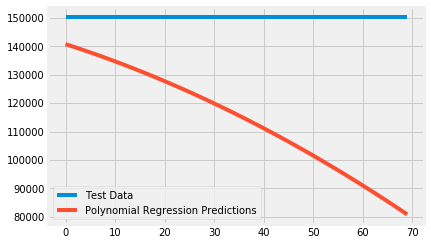

In [28]:
prediction(spain_recoveries)

MAE: 508317.7137413489
MSE: 368220634122.00116
-2.0847315000730386
          Date  Predicted number of Confirmed Cases
0   01/06/2021                             340544.0
1   01/07/2021                             341127.0
2   01/08/2021                             341709.0
3   01/09/2021                             342287.0
4   01/10/2021                             342863.0
5   01/11/2021                             343436.0
6   01/12/2021                             344007.0
7   01/13/2021                             344575.0
8   01/14/2021                             345141.0
9   01/15/2021                             345703.0
10  01/16/2021                             346264.0
11  01/17/2021                             346821.0
12  01/18/2021                             347376.0
13  01/19/2021                             347928.0
14  01/20/2021                             348478.0
15  01/21/2021                             349025.0
16  01/22/2021                             349570

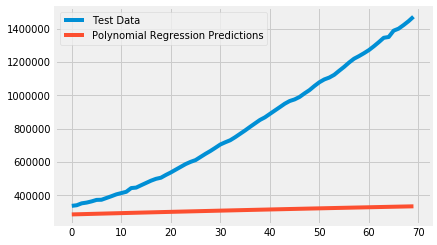

In [29]:
prediction(germany_recoveries)

MAE: 55845.51861212614
MSE: 3678983113.878603
-4.556502446380825
          Date  Predicted number of Confirmed Cases
0   01/06/2021                             113386.0
1   01/07/2021                             113396.0
2   01/08/2021                             113403.0
3   01/09/2021                             113408.0
4   01/10/2021                             113411.0
5   01/11/2021                             113413.0
6   01/12/2021                             113412.0
7   01/13/2021                             113409.0
8   01/14/2021                             113405.0
9   01/15/2021                             113398.0
10  01/16/2021                             113389.0
11  01/17/2021                             113379.0
12  01/18/2021                             113366.0
13  01/19/2021                             113351.0
14  01/20/2021                             113335.0
15  01/21/2021                             113316.0
16  01/22/2021                             113295.0

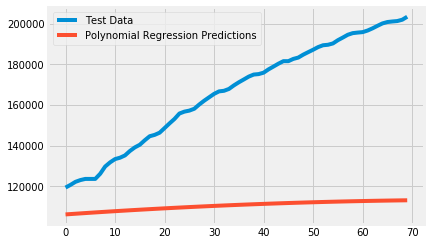

In [30]:
prediction(france_recoveries)

MAE: 565048.7570859505
MSE: 492483038467.31244
-1.737813809819078
          Date  Predicted number of Confirmed Cases
0   01/06/2021                             286204.0
1   01/07/2021                             286420.0
2   01/08/2021                             286633.0
3   01/09/2021                             286842.0
4   01/10/2021                             287046.0
5   01/11/2021                             287247.0
6   01/12/2021                             287444.0
7   01/13/2021                             287637.0
8   01/14/2021                             287825.0
9   01/15/2021                             288010.0
10  01/16/2021                             288191.0
11  01/17/2021                             288368.0
12  01/18/2021                             288541.0
13  01/19/2021                             288710.0
14  01/20/2021                             288875.0
15  01/21/2021                             289036.0
16  01/22/2021                             289193.

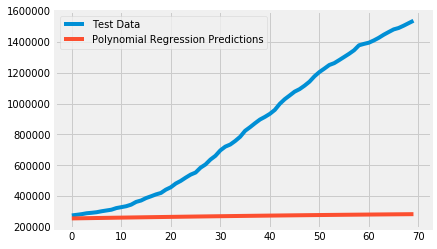

In [31]:
prediction(italy_recoveries)

MAE: 33603.719517923615
MSE: 1293599429.2156303
-766.5624156353249
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              24256.0
1   01/07/2021                              23475.0
2   01/08/2021                              22689.0
3   01/09/2021                              21899.0
4   01/10/2021                              21105.0
5   01/11/2021                              20305.0
6   01/12/2021                              19502.0
7   01/13/2021                              18693.0
8   01/14/2021                              17880.0
9   01/15/2021                              17063.0
10  01/16/2021                              16240.0
11  01/17/2021                              15414.0
12  01/18/2021                              14582.0
13  01/19/2021                              13746.0
14  01/20/2021                              12906.0
15  01/21/2021                              12061.0
16  01/22/2021                              11211

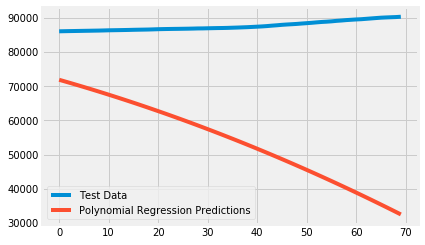

In [32]:
prediction(china_recoveries)

# Deaths Prediction

MAE: 53117.51093208928
MSE: 4364953900.652288
0.8997045188011301
          Date  Predicted number of Confirmed Cases
0   01/06/2021                            1822483.0
1   01/07/2021                            1830783.0
2   01/08/2021                            1839099.0
3   01/09/2021                            1847432.0
4   01/10/2021                            1855781.0
5   01/11/2021                            1864148.0
6   01/12/2021                            1872531.0
7   01/13/2021                            1880930.0
8   01/14/2021                            1889347.0
9   01/15/2021                            1897780.0
10  01/16/2021                            1906230.0
11  01/17/2021                            1914697.0
12  01/18/2021                            1923180.0
13  01/19/2021                            1931680.0
14  01/20/2021                            1940197.0
15  01/21/2021                            1948731.0
16  01/22/2021                            1957281.0

NameError: name 'linear_pred' is not defined

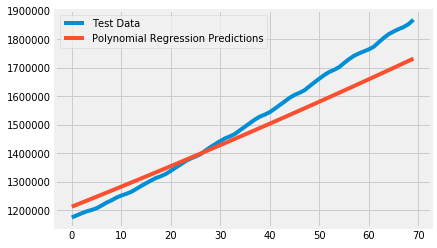

In [33]:
prediction(total_deaths)
plot_predictions(adjusted_dates, total_deaths, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 36594.8016385786
MSE: 1745255226.4474614
-20.804615210899325
          Date  Predicted number of Confirmed Cases
0   01/06/2021                             243884.0
1   01/07/2021                             245582.0
2   01/08/2021                             247287.0
3   01/09/2021                             248997.0
4   01/10/2021                             250713.0
5   01/11/2021                             252435.0
6   01/12/2021                             254163.0
7   01/13/2021                             255896.0
8   01/14/2021                             257635.0
9   01/15/2021                             259380.0
10  01/16/2021                             261131.0
11  01/17/2021                             262888.0
12  01/18/2021                             264650.0
13  01/19/2021                             266418.0
14  01/20/2021                             268192.0
15  01/21/2021                             269972.0
16  01/22/2021                             271757.

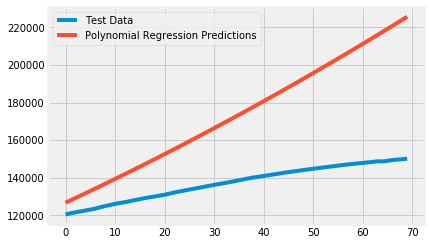

In [34]:
prediction(india_deaths)

MAE: 17414.533627212353
MSE: 566943097.8542278
0.631650141302497
          Date  Predicted number of Confirmed Cases
0   01/06/2021                             312081.0
1   01/07/2021                             313024.0
2   01/08/2021                             313966.0
3   01/09/2021                             314909.0
4   01/10/2021                             315851.0
5   01/11/2021                             316794.0
6   01/12/2021                             317736.0
7   01/13/2021                             318678.0
8   01/14/2021                             319620.0
9   01/15/2021                             320563.0
10  01/16/2021                             321505.0
11  01/17/2021                             322447.0
12  01/18/2021                             323389.0
13  01/19/2021                             324331.0
14  01/20/2021                             325273.0
15  01/21/2021                             326215.0
16  01/22/2021                             327156.0

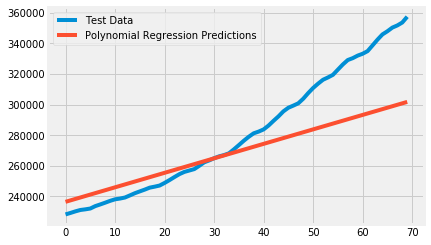

In [35]:
prediction(us_deaths)

MAE: 21116.786189871083
MSE: 584351191.6234049
-6.28935715324135
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              30655.0
1   01/07/2021                              30428.0
2   01/08/2021                              30199.0
3   01/09/2021                              29968.0
4   01/10/2021                              29735.0
5   01/11/2021                              29500.0
6   01/12/2021                              29264.0
7   01/13/2021                              29025.0
8   01/14/2021                              28785.0
9   01/15/2021                              28542.0
10  01/16/2021                              28298.0
11  01/17/2021                              28051.0
12  01/18/2021                              27803.0
13  01/19/2021                              27553.0
14  01/20/2021                              27301.0
15  01/21/2021                              27047.0
16  01/22/2021                              26791.0

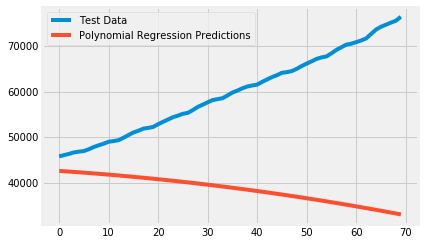

In [36]:
prediction(uk_deaths)

MAE: 17818.16738180194
MSE: 367999598.44536334
-15.162134877531024
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              20307.0
1   01/07/2021                              20123.0
2   01/08/2021                              19937.0
3   01/09/2021                              19750.0
4   01/10/2021                              19562.0
5   01/11/2021                              19372.0
6   01/12/2021                              19180.0
7   01/13/2021                              18987.0
8   01/14/2021                              18793.0
9   01/15/2021                              18597.0
10  01/16/2021                              18400.0
11  01/17/2021                              18202.0
12  01/18/2021                              18002.0
13  01/19/2021                              17800.0
14  01/20/2021                              17597.0
15  01/21/2021                              17393.0
16  01/22/2021                              17187

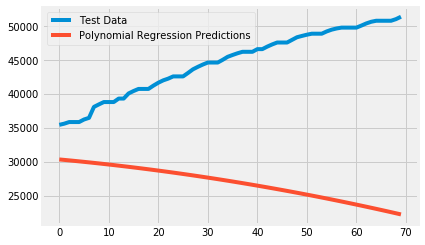

In [37]:
prediction(spain_deaths)

MAE: 11260.871155713772
MSE: 202553670.1987234
-2.166830177223645
          Date  Predicted number of Confirmed Cases
0   01/06/2021                               6403.0
1   01/07/2021                               6347.0
2   01/08/2021                               6291.0
3   01/09/2021                               6234.0
4   01/10/2021                               6177.0
5   01/11/2021                               6120.0
6   01/12/2021                               6062.0
7   01/13/2021                               6003.0
8   01/14/2021                               5945.0
9   01/15/2021                               5885.0
10  01/16/2021                               5826.0
11  01/17/2021                               5765.0
12  01/18/2021                               5705.0
13  01/19/2021                               5644.0
14  01/20/2021                               5582.0
15  01/21/2021                               5520.0
16  01/22/2021                               5458.

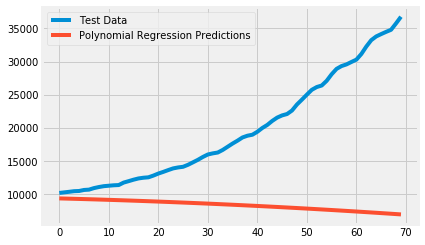

In [38]:
prediction(germany_deaths)

MAE: 25270.985172320386
MSE: 778852705.1991013
-8.15310401518457
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              19815.0
1   01/07/2021                              19612.0
2   01/08/2021                              19407.0
3   01/09/2021                              19201.0
4   01/10/2021                              18993.0
5   01/11/2021                              18783.0
6   01/12/2021                              18572.0
7   01/13/2021                              18360.0
8   01/14/2021                              18146.0
9   01/15/2021                              17930.0
10  01/16/2021                              17713.0
11  01/17/2021                              17494.0
12  01/18/2021                              17274.0
13  01/19/2021                              17052.0
14  01/20/2021                              16828.0
15  01/21/2021                              16603.0
16  01/22/2021                              16377.0

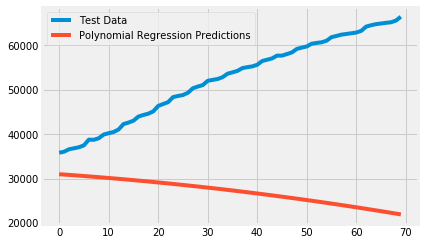

In [39]:
prediction(france_deaths)

MAE: 29095.32176246328
MSE: 1114632493.6336772
-6.231841058696171
          Date  Predicted number of Confirmed Cases
0   01/06/2021                              16905.0
1   01/07/2021                              16617.0
2   01/08/2021                              16327.0
3   01/09/2021                              16034.0
4   01/10/2021                              15740.0
5   01/11/2021                              15444.0
6   01/12/2021                              15145.0
7   01/13/2021                              14845.0
8   01/14/2021                              14543.0
9   01/15/2021                              14238.0
10  01/16/2021                              13932.0
11  01/17/2021                              13624.0
12  01/18/2021                              13313.0
13  01/19/2021                              13001.0
14  01/20/2021                              12687.0
15  01/21/2021                              12370.0
16  01/22/2021                              12052.

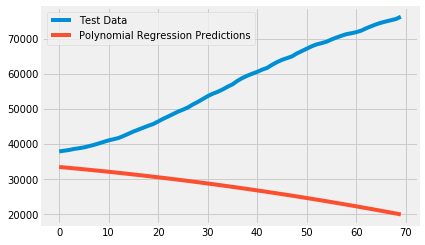

In [40]:
prediction(italy_deaths)

MAE: 1579.1038293014356
MSE: 2869099.533963127
-13319.86489752925
          Date  Predicted number of Confirmed Cases
0   01/06/2021                               1628.0
1   01/07/2021                               1588.0
2   01/08/2021                               1547.0
3   01/09/2021                               1506.0
4   01/10/2021                               1464.0
5   01/11/2021                               1423.0
6   01/12/2021                               1381.0
7   01/13/2021                               1339.0
8   01/14/2021                               1297.0
9   01/15/2021                               1254.0
10  01/16/2021                               1211.0
11  01/17/2021                               1168.0
12  01/18/2021                               1125.0
13  01/19/2021                               1082.0
14  01/20/2021                               1038.0
15  01/21/2021                                994.0
16  01/22/2021                                950.

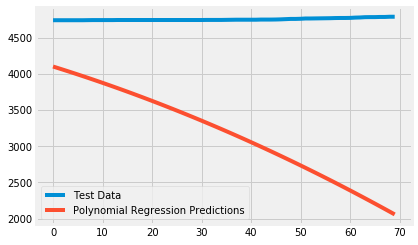

In [41]:
prediction(china_deaths)